# 11.1 Zadanie: Ceny akcji

#### Importujemy nizbedne biblioteki

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import pandas as pd
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.graph_objs as go

#### ustawienia wykresów

In [5]:
init_notebook_mode(connected=True)
cf.go_offline()

## Zadanie 1

#### Importujemy dane z plików csv i sprawdzamy ostatnią datę w pliku - data zakończenia obserwacji nie jest taka sama dla obu zestawów danych

In [8]:
stocks_prices_KGHM = pd.read_csv('kgh_d.csv')
last_date = stocks_prices_KGHM.iloc[-1,0]
print(last_date)
stocks_prices_KGHM

2020-06-30


,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221
...,...,...,...,...,...,...
1366,2020-06-24,89.86,91.68,88.34,88.56,496999
1367,2020-06-25,88.22,90.08,87.94,89.86,426844
1368,2020-06-26,90.00,90.84,88.40,88.68,550372
1369,2020-06-29,88.60,90.46,88.60,90.46,371375


In [9]:
copper_prices = pd.read_csv('ca_c_f_d.csv')
#copper_prices = copper_prices[copper_prices['Data']<=last_date]
last_date_cop = copper_prices.iloc[-1,0]
print(last_date_cop)
copper_prices

2020-07-13


,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5
...,...,...,...,...,...
1395,2020-07-07,6086.0,6086.0,6086.0,6086.0
1396,2020-07-08,6194.0,6194.0,6194.0,6194.0
1397,2020-07-09,6339.5,6339.5,6339.5,6339.5
1398,2020-07-10,6322.5,6322.5,6322.5,6322.5


## Zadanie 2

#### Łączymy oba zestawy danych i naprawiamy problem z inną liczbą danych dla osi x

In [12]:
full_data_table = pd.merge(stocks_prices_KGHM,copper_prices,how='inner',on='Data')
full_data_table

,Data,Otwarcie_x,Najwyzszy_x,Najnizszy_x,Zamkniecie_x,Wolumen,Otwarcie_y,Najwyzszy_y,Najnizszy_y,Zamkniecie_y
0,2015-01-02,102.45,102.83,101.97,102.40,309987,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,102.16,102.88,99.91,100.09,479228,6216.0,6216.0,6216.0,6216.0
2,2015-01-07,100.53,105.45,99.67,104.89,966372,6170.0,6170.0,6170.0,6170.0
3,2015-01-08,105.35,107.15,105.35,107.11,711805,6230.5,6230.5,6230.5,6230.5
4,2015-01-09,107.15,107.15,103.87,104.33,563221,6151.0,6151.0,6151.0,6151.0
...,...,...,...,...,...,...,...,...,...,...
1348,2020-06-24,89.86,91.68,88.34,88.56,496999,5871.0,5871.0,5871.0,5871.0
1349,2020-06-25,88.22,90.08,87.94,89.86,426844,5880.5,5880.5,5880.5,5880.5
1350,2020-06-26,90.00,90.84,88.40,88.68,550372,5985.5,5985.5,5985.5,5985.5
1351,2020-06-29,88.60,90.46,88.60,90.46,371375,5957.0,5957.0,5957.0,5957.0


#### Tworzymy wymagane przez zadanie wykresy

In [14]:
fig = make_subplots(rows=2,cols=1,subplot_titles=['ceny zamknięcia KGHM','ceny miedzi'],shared_xaxes=True)

In [15]:
fig.add_trace(go.Scatter(x=full_data_table['Data'],
                         y= full_data_table['Zamkniecie_x']),row=1,col=1)
fig.add_trace(go.Scatter(x=full_data_table['Data'],
                         y=full_data_table['Zamkniecie_y']),row=2,col=1)
fig.update_layout(title='Porównanie cen akcji KGHM i ceny miedzi',showlegend=False, autosize=False, width=1000, height=600)
iplot(fig)

## Zadanie 3 i 4

#### Dodajemy tabelę do wykresów i formatujemy wykresy i tekst

In [18]:
fig = make_subplots(
    rows=3, cols=1,subplot_titles=['Ceny akcji KGHM','Ceny miedzi','Tabela danych'],shared_xaxes=True,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "table"}]])

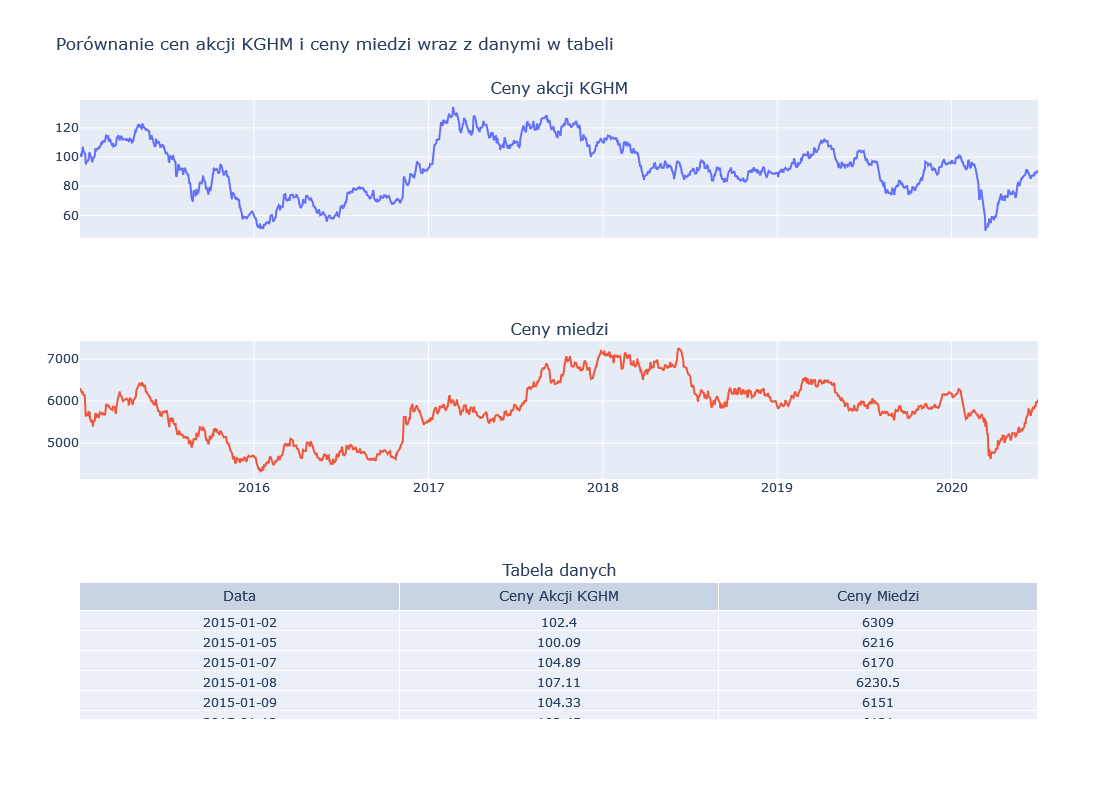

In [19]:
fig.add_trace(go.Scatter(x=full_data_table['Data'],
                         y= full_data_table['Zamkniecie_x']),row=1,col=1)
fig.add_trace(go.Scatter(x=full_data_table['Data'],
                         y=full_data_table['Zamkniecie_y']),row=2,col=1)
fig.add_trace(
    go.Table(
             header=dict(
                 values=["Data", "Ceny Akcji KGHM","Ceny Miedzi"],
                 font=dict(size=14),
                 align="center"),
             cells=dict(
                 values=[full_data_table.loc[:,'Data'],full_data_table.loc[:,'Zamkniecie_x'],full_data_table.loc[:,'Zamkniecie_y']]
             )),
    row=3, col=1
)

fig.update_layout(title='Porównanie cen akcji KGHM i ceny miedzi wraz z danymi w tabeli',showlegend=False, autosize=False, width=1100, height=800)
iplot(fig)